In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
dataset = pd.read_csv('appdata10.csv')

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


## DATA CLEANING 

In [5]:
# From the above we can see that the hour columns is not showing this is as a result of the fact that the hour column
# is in the string format so in other to change that we have to convert it to datetime format by doing this: 


dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)
dataset['hour'].head

<bound method NDFrame.head of 0         2
1         1
2        19
3        16
4        18
5         9
6         2
7         3
8        14
9        18
10        4
11       11
12        6
13       19
14        4
15       18
16       16
17       21
18        5
19       17
20        9
21        4
22       17
23        2
24       20
25       18
26       16
27        1
28       11
29       17
         ..
49970    15
49971    11
49972    15
49973    18
49974    20
49975    18
49976    20
49977    15
49978    17
49979    14
49980     7
49981     4
49982     2
49983    13
49984    16
49985    23
49986    18
49987    19
49988     2
49989    17
49990    17
49991    22
49992    15
49993     2
49994    19
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32>

## Plotting 

In [8]:
dataset_2 = dataset.copy()
dataset_2 = dataset_2.drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset_2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


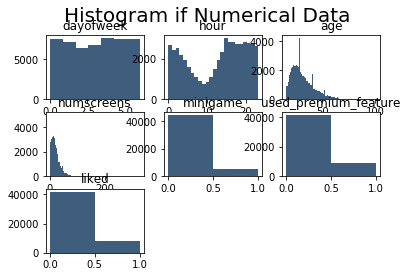

In [17]:
## Histogram of our numerical dataset 

plt.suptitle('Histogram if Numerical Data', fontsize = 20)

# Since we are iterating between diffrent fields we will have to use a for loop 

for i in range(1, dataset_2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset_2.columns.values[i - 1])
    
    #Lets create how many bands we need for the instogram 
    
    vals = np.size(dataset_2.iloc[:, i - 1].unique())
    
    plt.hist(dataset_2.iloc[:, i - 1], bins = vals, color = '#3F5D7D') 

# Correlation with Response 

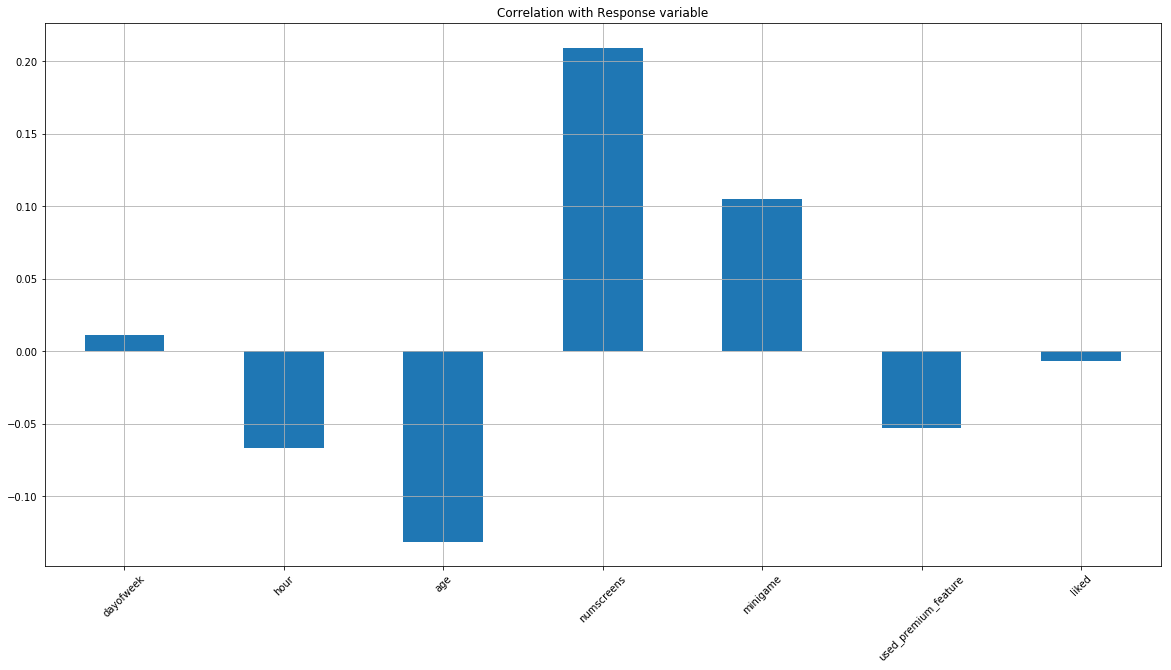

In [18]:
dataset_2.corrwith(dataset.enrolled).plot.bar(figsize= (20,10),
                    title = 'Correlation with Response variable',
                    fontsize = 10, rot = 45,
                    grid = True )

## Correlation fields 

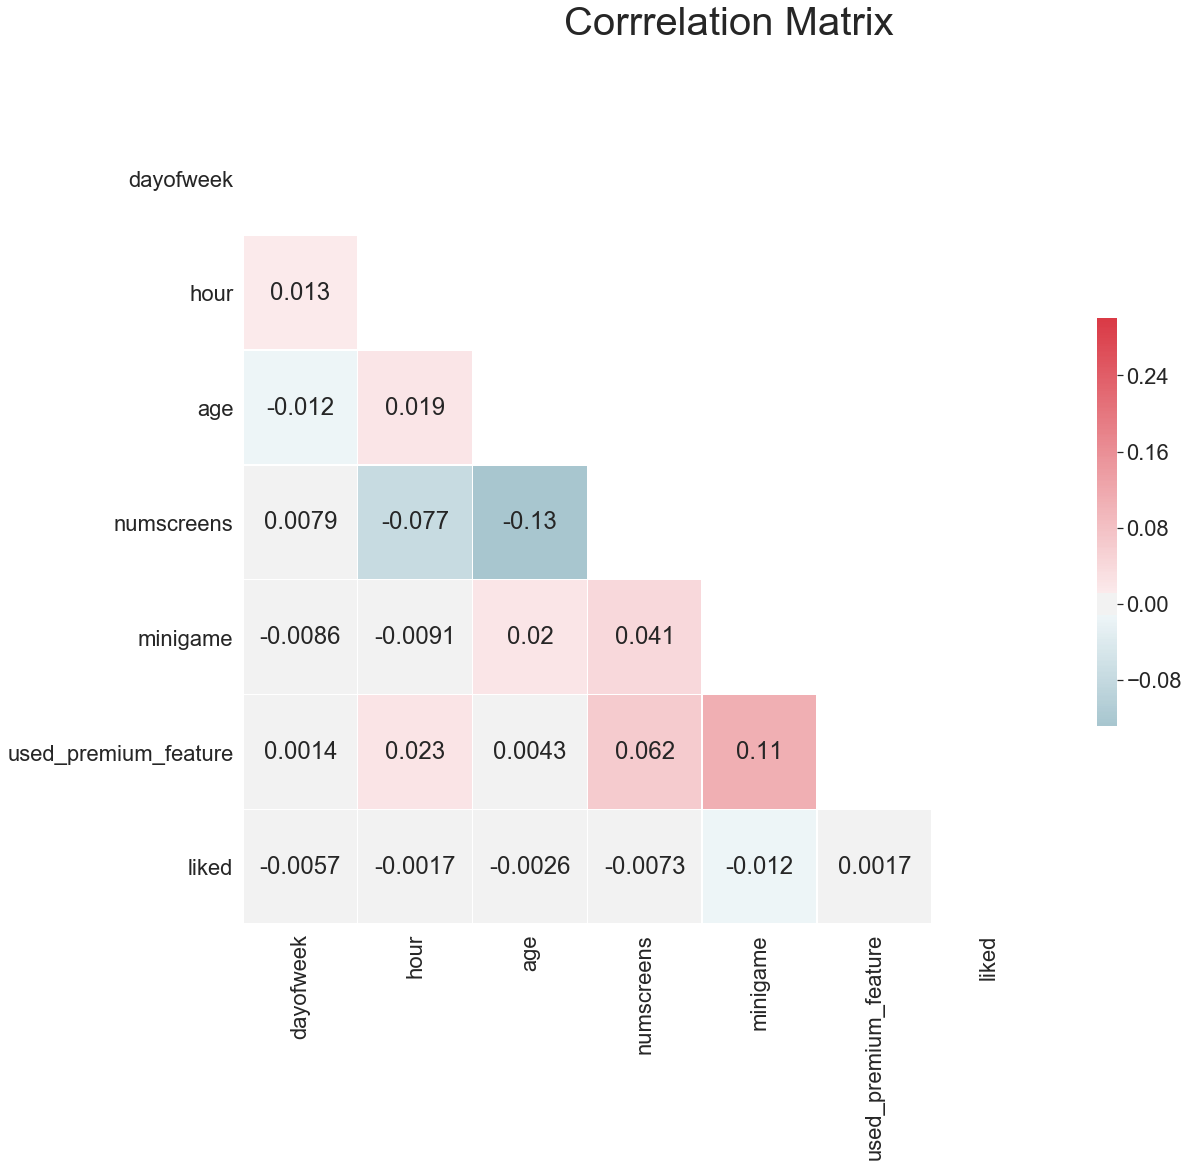

In [28]:
sns.set(style='white' , font_scale = 2)
#Compute the correlation matric 

corr = dataset_2.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Corrrelation Matrix", fontsize = 40)

#Generate custom diverging color map

cmap = sns.diverging_palette(220, 10, as_cmap = True)

#Draw the heatmap with the mask and collect aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
           square = True, linewidths = .5, cbar_kws = {"shrink": .5} , annot = True)

## Feature engineering Processes continues (Data pre-processing)

In [31]:
#Now lets Change the Date time from str format to actual date and time format 
# To change all the values in the column titled 'first_open' and 'enrolled_date' :

dataset.dtypes
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]
# Now for that of the enrroled_date we have some nan values to stop it from throwing an error we do this:

dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

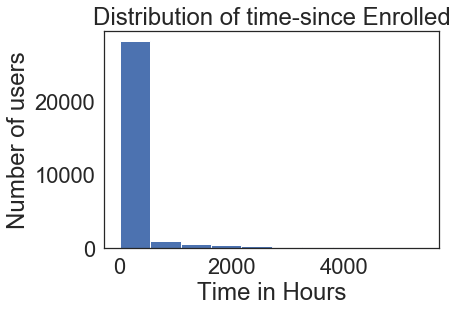

In [32]:
# Now let us calcu;late the  difference between the time of first open to the time of enrollment so we can get a range of time which we will use 
# as the time for the person to get the app and enroll for the premium version 

dataset['Diffrence'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

# Lets plot a histogram to see the distribution diffrence
plt.hist(dataset['Diffrence'].dropna())
plt.title('Distribution of time-since Enrolled')
plt.xlabel('Time in Hours')
plt.ylabel('Number of users')
plt.show()


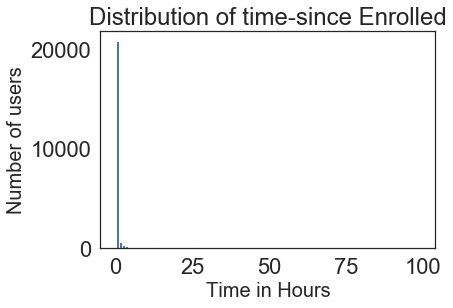

In [33]:
# Lets plot a histogram to see the distribution diffrence
plt.hist(dataset['Diffrence'].dropna(), range (0, 100))
plt.title('Distribution of time-since Enrolled')
plt.xlabel('Time in Hours', fontsize = 20)
plt.ylabel('Number of users', fontsize = 20)
plt.show()


In [35]:
# Now based on our data, let us remove those who didn't enroll within the first 48 hours :

dataset.loc[dataset.Diffrence > 48, 'enrolled'] = 0

In [37]:
#Now since we are using just the enrolled date we do not need the 'Diffrenece', 'first_open', and the 'enrolled_date' anymore 
# So we have to drop them 

dataset = dataset.drop(columns = ['Diffrence','first_open', 'enrolled_date'])